IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import tensorflow as tf

Uploadng and Reading the files.

In [4]:
data_train = pd.read_csv("train.csv")
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,D


In [5]:
data_test = pd.read_csv("test.csv")
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


Checking the shape of the datasets

In [9]:
data_train.shape

(14999, 9)

In [10]:
data_test.shape

(8764, 8)

Visualization

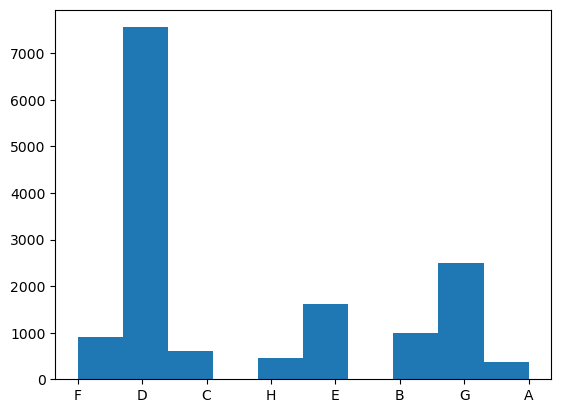

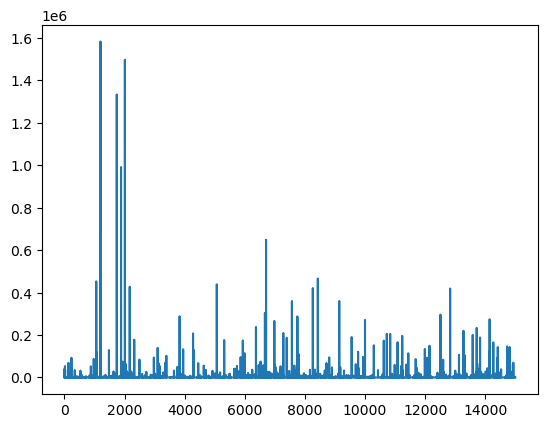

C:\conda_tmp\ipykernel_20936\922901716.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_train.corr()


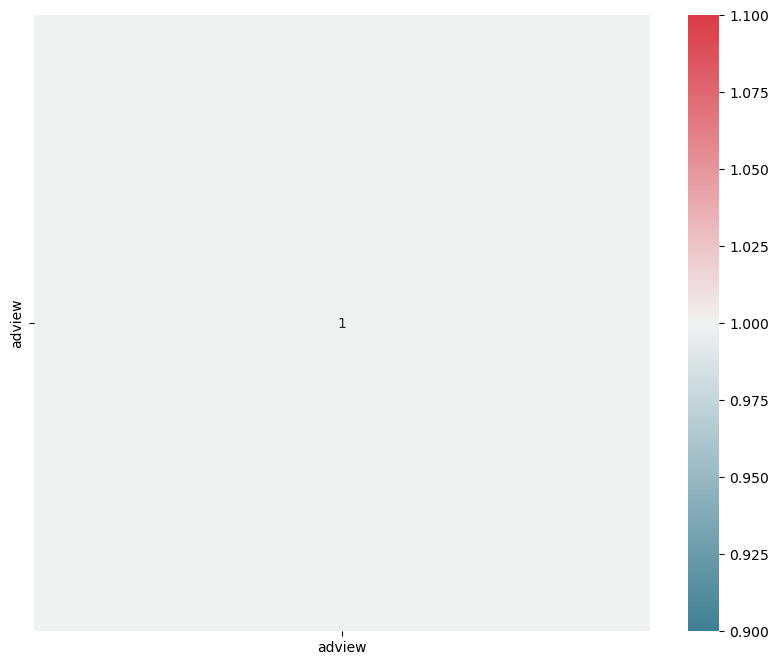

In [12]:
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            square=True, ax=ax,annot=True)
plt.show()

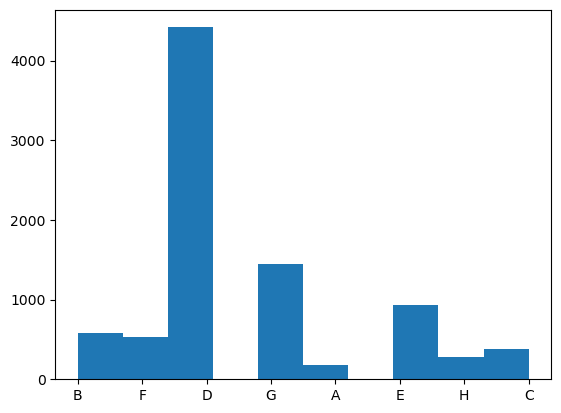

In [13]:
# Individual Plots
plt.hist(data_test["category"])
plt.show()

Removing character "F" present in data

In [14]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,D


In [15]:
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


Assigning each category a number for Category feature

In [16]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,6
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,4
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,3
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,8
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,4


In [17]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


Converting values to integers for views, likes, comments, dislikes and adview

In [19]:
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

In [20]:
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid1=data_test['vidid']

Encoding features like Category, Duration, Vidid

In [21]:
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,1090,2925,6
1,2741,2,1707,56,2,6,64,3040,4
2,8138,1,2023,25,0,2,122,1863,3
3,9004,6,620860,777,161,153,2088,2546,8
4,122,1,666,1,0,0,2233,1963,4


In [22]:
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


Visualization

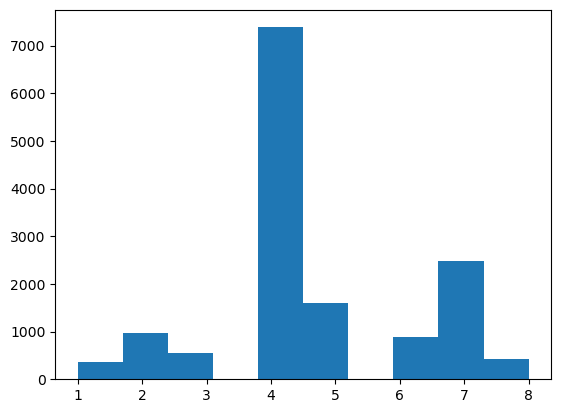

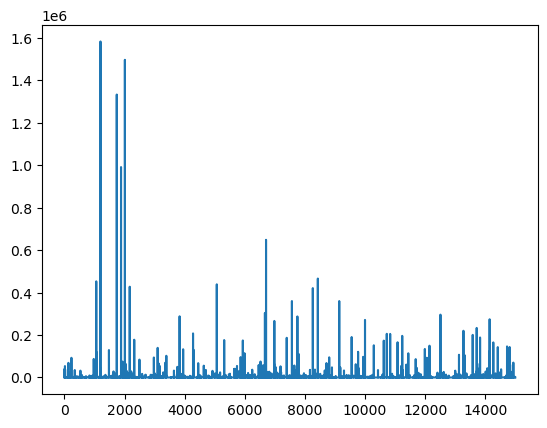

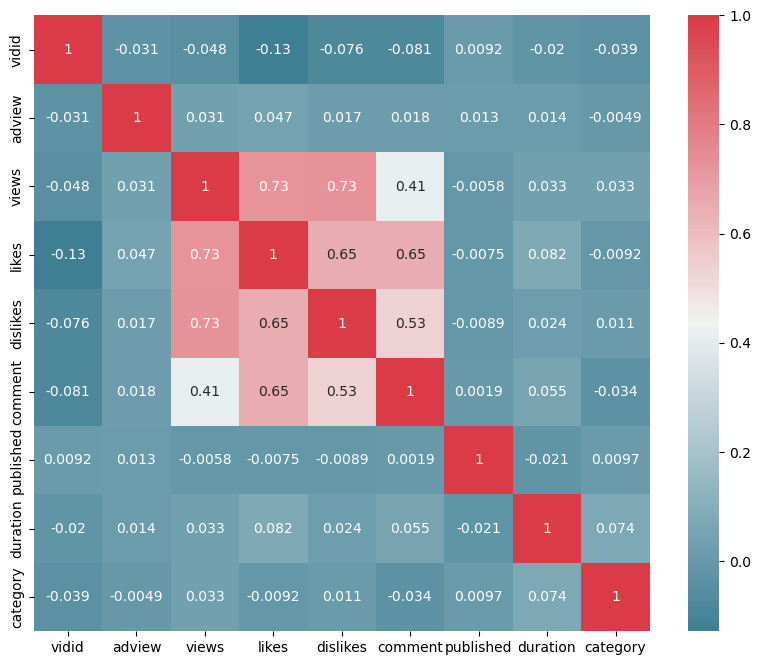

In [23]:
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            square=True, ax=ax,annot=True)
plt.show()

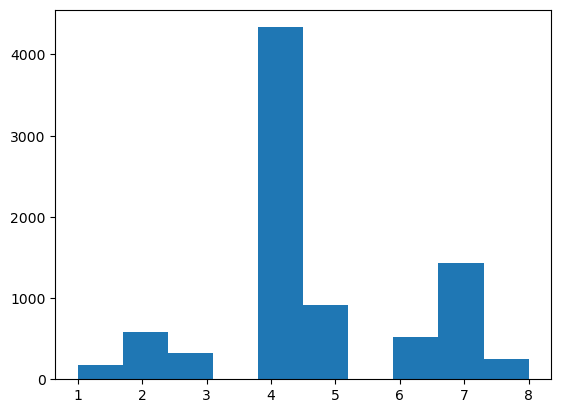

In [24]:
# Individual Plots
plt.hist(data_test["category"])
plt.show()

Converting Time_in_sec for duration

In [25]:
import datetime
import time


def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
  train=pd.read_csv("train.csv")
  mp = pd.read_csv(path + "train.csv")["duration"]
  time = mp.apply(checki)
  
  def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

  time1=time.apply(func_sec)

  data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,1090,2925,6
1,2741,2,1707,56,2,6,64,3040,4
2,8138,1,2023,25,0,2,122,1863,3
3,9004,6,620860,777,161,153,2088,2546,8
4,122,1,666,1,0,0,2233,1963,4


In [26]:
import datetime
import time

def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
  test=pd.read_csv("test.csv")
  mp = pd.read_csv(path + "test.csv")["duration"]
  time = mp.apply(checki)
  
  def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

  time1=time.apply(func_sec)

  data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


Spliting Data

In [27]:
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
test_y = pd.DataFrame(data_test.iloc[:, 0].values, columns=['vidid'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_test = data_test.drop(['vidid'], axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,1090,2925,6
1,1707,56,2,6,64,3040,4
2,2023,25,0,2,122,1863,3
3,620860,777,161,153,2088,2546,8
4,666,1,0,0,2233,1963,4


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()
X_train.shape

(11708, 7)

Normalising Data

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
data_test = scaler.transform(data_test)
X_train.mean()

0.2358529885377965

Evaluation Metrics

In [31]:
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Linear Regression

In [33]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3501.003955144692
Mean Squared Error: 838540463.708838
Root Mean Squared Error: 28957.56315211689


Support Vector Regressor (SVR)

In [34]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3501.003955144692
Mean Squared Error: 838540463.708838
Root Mean Squared Error: 28957.56315211689


Descision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 5264.659494535519
Mean Squared Error: 4173811264.0433745
Root Mean Squared Error: 64605.0405467203


Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth
                                      , min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 3695.503114798689
Mean Squared Error: 761791138.6765606
Root Mean Squared Error: 27600.564100694766


Artificial Neural Network

In [37]:
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=['mean_squared_error'])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()import joblib
print_error(X_test,y_test,ann)joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

Epoch 1/100
366/366 [==============================] - 2s 2ms/step - loss: 767406528.0000 - mean_squared_error: 767406528.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767400448.0000 - mean_squared_error: 767400448.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767386816.0000 - mean_squared_error: 767386816.0000
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 767357440.0000 - mean_squared_error: 767357440.0000
Epoch 5/100
366/366 [==============================] - 1s 1ms/step - loss: 767303744.0000 - mean_squared_error: 767303744.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767228032.0000 - mean_squared_error: 767228032.0000
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 767133632.0000 - mean_squared_error: 767133632.0000
Epoch 8/100
366/366 [==============================] - 1s 1ms/step - loss: 767020992.0000 - mean_squared_error:

366/366 [==============================] - 0s 1ms/step - loss: 764340160.0000 - mean_squared_error: 764340160.0000
Epoch 66/100
366/366 [==============================] - 1s 2ms/step - loss: 764336576.0000 - mean_squared_error: 764336576.0000
Epoch 67/100
366/366 [==============================] - 0s 1ms/step - loss: 764336768.0000 - mean_squared_error: 764336768.0000
Epoch 68/100
366/366 [==============================] - 1s 1ms/step - loss: 764336064.0000 - mean_squared_error: 764336064.0000
Epoch 69/100
366/366 [==============================] - 1s 1ms/step - loss: 764334528.0000 - mean_squared_error: 764334528.0000
Epoch 70/100
366/366 [==============================] - 1s 2ms/step - loss: 764332544.0000 - mean_squared_error: 764332544.0000
Epoch 71/100
366/366 [==============================] - 1s 2ms/step - loss: 764333120.0000 - mean_squared_error: 764333120.0000
Epoch 72/100
366/366 [==============================] - 1s 2ms/step - loss: 764331392.0000 - mean_squared_error: 7643

Saving Scikitlearn models

In [38]:
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

Saving Keras Artificial Neural Network model

In [39]:
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

C:\Users\Tushar Rajpali\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Loading model

In [40]:
model = joblib.load('decisiontree_youtubeadview.pkl')

In [41]:
model = keras.models.load_model('ann_youtubeadview.h5')

Predicting

In [42]:
preds = model.predict(data_test)
preds = preds.astype(np.int16)
preds = preds.reshape(1, -1)[0].tolist()

268/268 [==============================] - 0s 1ms/step


Creating Predictions.csv File

In [43]:
d = {'adview': preds}
pd.DataFrame(d).to_csv('predictions.csv', index=False)